# Example of Gait Sequence Detection for a supervised 20m walk

For this example we use the Gait Sequence detection to determine the gait phases of a supervised 20m walk. The data was recorded with a [HasoMed IMU](https://hasomed.de/) at 100.0 Hz. Three IMU were placed on the lefnt and right shank of the subject, one at the lower back. The data was recorded by a clinican with a manufacturer software and exported as a CSV file.

This notebook should serve as a low-level reference on how to load data and plot events.

In [38]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from ngmt.modules.gsd import GSDB
from ngmt.utils.importers import import_hasomed_imu
from ngmt.utils.ngmt_data_classes import ChannelData, RecordingData

In [28]:
# set path
path_example = r'C:\Users\User\Desktop\kiel\NGMT\examples\data\exDataHasomed.csv'

In [29]:
# load data via the hasomed importer
data = import_hasomed_imu(path_example)

Data has 27 channels and 3332 samples
Time series has 3332 samples


In [19]:
# select only data channels of type accceleration (ACCEL)
type_oi = 'ACCEL'
acc = data.pick_channel_types(type_oi)


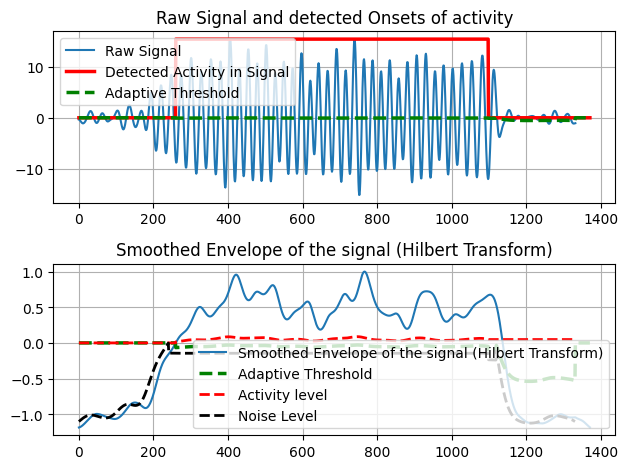

Gait sequence(s) detected.
Gait Sequence:
Start Time: 6.05 seconds
End Time: 27.95 seconds


In [37]:
# only use the last three columns of the data (lower back)
acc_data_lower_back = []
acc_data_lower_back = acc.data[:,-3:]

# Use Gait_Sequence_Detection to detect gait sequence 
gait_sequences = GSDB.Gait_Sequence_Detection(imu_acceleration=acc_data_lower_back, sampling_frequency=100,plot_results=False)

# Display the detected gait sequences
print(f"Gait Sequence:")
print(f"Start Time: {gait_sequences[0]['Start']} seconds")
print(f"End Time: {gait_sequences[0]['End']} seconds")


## Plot GSD events
In the following, the raw data of the lower back sensor is plotted with the detected events. The events are plotted as vertical lines. The events are:
- **Start**: Start of the gait sequence
- **End**: End of the gait sequence


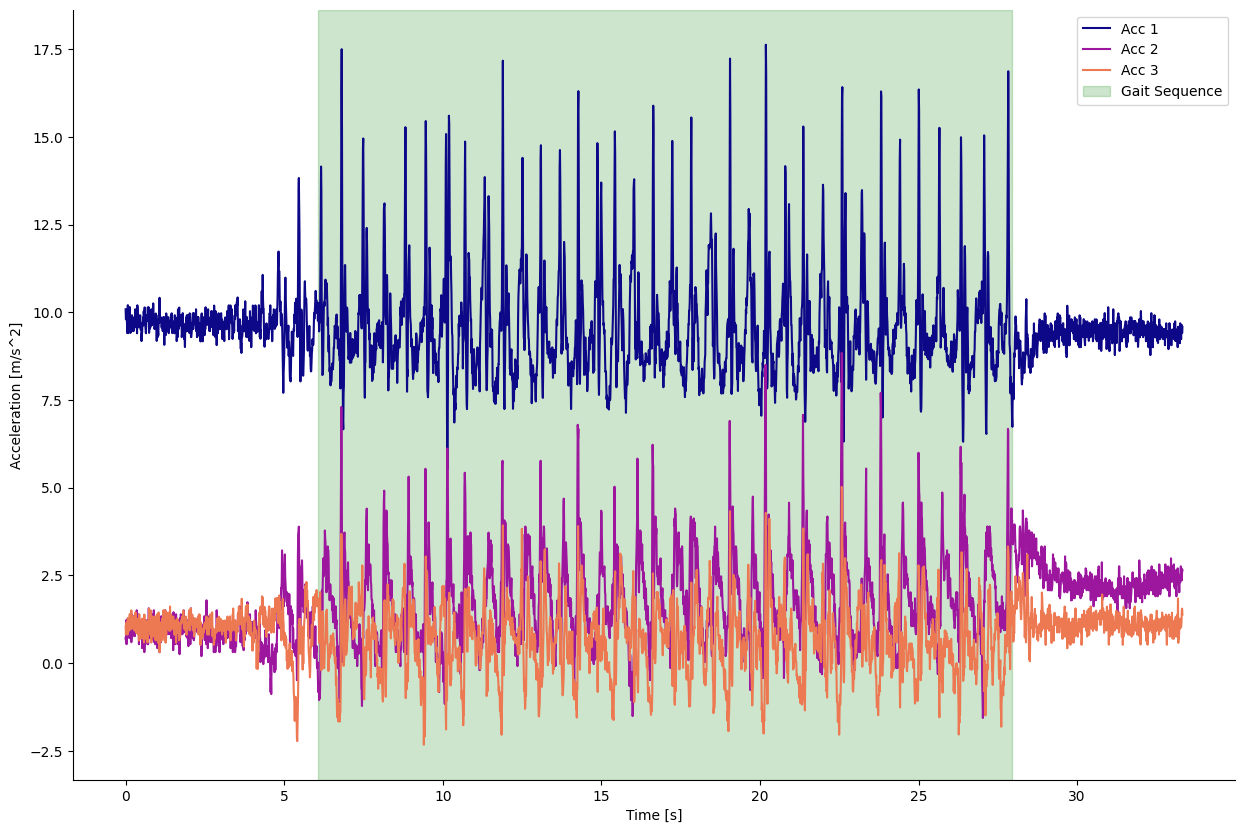

In [49]:
# plot the raw data from the lower back
fig, ax = plt.subplots(1,1,figsize=(15,10))

# plot the acceleration data with three colors from the magma colormap
for i in range(3):
    ax.plot(acc.times, acc_data_lower_back[:,i], color=plt.cm.plasma(i/3), label=f'Acc {i+1}')

# plot the gait sequences
for gait_sequence in gait_sequences:
    ax.axvspan(gait_sequence['Start'], gait_sequence['End'], alpha=0.2, color='green', label='Gait Sequence')

ax.set_xlabel('Time [s]')
ax.set_ylabel(f'Acceleration [{acc.channels.units[0]}]') # use the channel unit from the data class
#remove the box around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
